## Tutorial 1.2 Text Mining Example and Exercise (15 minutes)

There is a nice book on text mining: https://www.tidytextmining.com/. Here we do one example from that book. It creates the six novels from Jane Austen into a data frame that we can do statistical data analysis on. Someone has written a special package called janeaustenr which brings the novels into a data frame.

First we install and load the packages we need. 

In [13]:
#install.packages("janeaustenr")
#install.packages("tidytext")

In [15]:
# Load the packages/libraries needed
library(janeaustenr)
library(dplyr)       #data manipulation
library(ggplot2)     #visualizations
library(gridExtra)   #viewing multiple plots together
library(tidytext)    #text mining
library(stringr)     #for regular expressions
#library(wordcloud2) #creative visualizations

Now we create a data frame with one line per row and columns telling which book and which chapter the line belongs to 

In [18]:
original_books <- austen_books() %>% # Creates a tidy data frame with each book line per row
group_by(book) %>%                   # Do the following per book, e.g. add line numbers   
mutate(linenumber = row_number(),    # Add columns with line number and chapters
chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]",ignore_case = TRUE)))) %>%
ungroup()                            # Ungroup the data frame
head(original_books)                       # Show the data new data frame 

text,book,linenumber,chapter
<chr>,<fct>,<int>,<int>
SENSE AND SENSIBILITY,Sense & Sensibility,1,0
,Sense & Sensibility,2,0
by Jane Austen,Sense & Sensibility,3,0
,Sense & Sensibility,4,0
(1811),Sense & Sensibility,5,0
,Sense & Sensibility,6,0


Now we have the six books with one book line per row. We need it with one word per row. For that we can use the unnest_tokens method in the tidytext package:

In [19]:
tidy_books <- original_books %>%
  unnest_tokens(word, text)          # Unnests each text (line) column in to a set of words 
head(tidy_books)

book,linenumber,chapter,word
<fct>,<int>,<int>,<chr>
Sense & Sensibility,1,0,sense
Sense & Sensibility,1,0,and
Sense & Sensibility,1,0,sensibility
Sense & Sensibility,3,0,by
Sense & Sensibility,3,0,jane
Sense & Sensibility,3,0,austen


Now we can mine the Austen novels. For example check the most used words:

In [21]:
word_counts<-tidy_books %>% count(word, sort = TRUE) 

In [23]:
#head(word_counts)

Of course these are boring words. We will see how to remove them later.

## Exercise

Now write the tidy_books data frame to a file called Data-Austen.csv for later usage: 

In [50]:
write_delim(tidy_books,'Data-Austen.cvs')

## More text mining 

Let us remove the stop_words defined in the tidytext package:

In [36]:
tidy_books <- tidy_books %>%
  anti_join(stop_words)

Joining, by = "word"



Now the word count looks more interesting:

In [44]:
wc<-tidy_books %>% count(word, sort = TRUE) 

In [38]:
head(word_counts)

word,n
<chr>,<int>
miss,1855
time,1337
fanny,862
dear,822
lady,817
sir,806


In [54]:
wc[wc$word=="love",]

word,n
<chr>,<int>
love,495


In [74]:
wc_b <- tidy_books %>%
group_by(book, chapter) %>%
count(word, sort = TRUE) %>%
#wc[wc$word=="sex",]
#mutate(linenumber = row_number(),    # Add columns with line number and chapters
#chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]",ignore_case = TRUE)))) %>%
ungroup()                    
head(wc_b)                   

book,chapter,word,n
<fct>,<int>,<chr>,<int>
Persuasion,21,elliot,62
Emma,47,harriet,52
Emma,21,miss,44
Persuasion,12,anne,43
Persuasion,12,captain,42
Persuasion,11,captain,41


In [111]:
#wc_b[wc_b$word=="sex",]
#wc_b[wc_b$word=="love",]
#wc_b[wc_b$word=="murder",]
#wc_b[wc_b$word=="doctor",]

#wc_sir<-wc_b[wc_b$word=="sir",]
head(wc_miss)

book,chapter,word,n
<fct>,<int>,<chr>,<int>
Emma,21,miss,44
Emma,26,miss,36
Mansfield Park,5,miss,31
Sense & Sensibility,21,miss,27
Mansfield Park,9,miss,27
Emma,1,miss,26


## Exercise 

Visualise the number of the word "miss" per chapter in the six Austen novels with box plots.

- Make a new data frame with the rows from wc_b containing "miss" 
- Use the example from Tutorial 1.1 to make the box plots

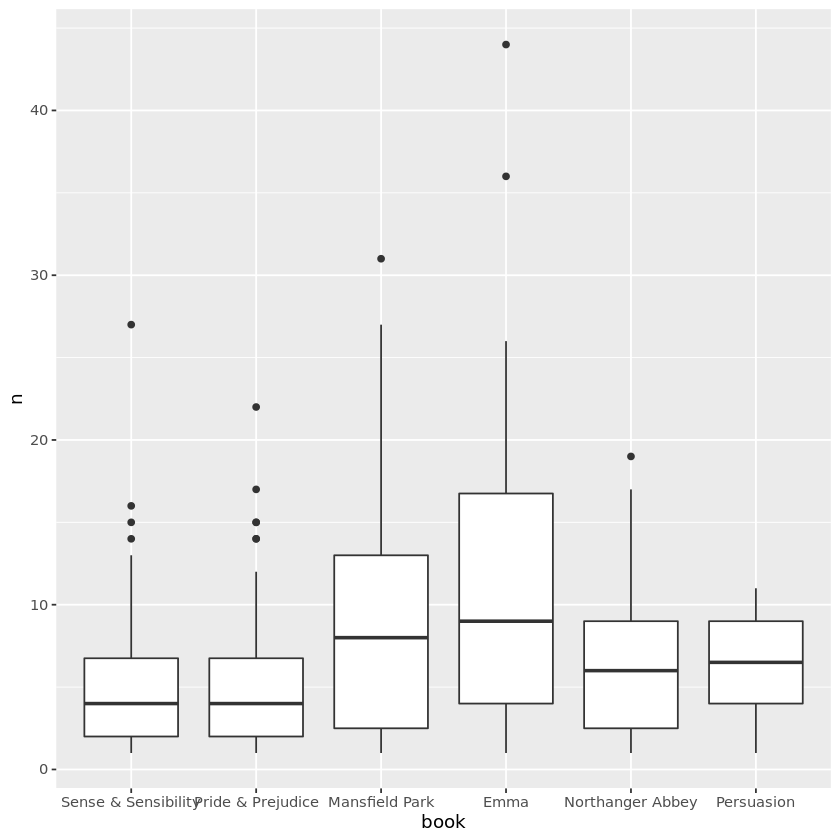

In [113]:
wc_miss<-wc_b[wc_b$word=="miss",]
qplot(book,n, data=wc_miss, geom = "boxplot")

## Done

As you proabably have noticed, working with R is all about knowing the packages to use ! We have now played a bit with the packages useful dplyr and tidytext. In addition we used a special package bringing the six Austen novels into a data frame.
